# Prototype: delta

| Properties      | Data    |
|---------------|-----------|
| *Labels* | `['BENIGN', 'DDoS']` |
| *Normalization* | `Min-Max` |
| *Sample Size* | `10.000`|
| *Adversarial Attack* | `CW` |
| *Explanations* | `SHAP` |


---

## *Has to be run first alone!*

In [1]:
# To import modules from the functions directory
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

## Data Preprocessing

In [2]:
import functions.data_preprocessing as dp
import importlib
importlib.reload(dp)

encoding_type = 0 # binary encoding
norm_type = 0 # min-max normalization
label_names = ['BENIGN', 'DDoS'] # labels to include
sample_size = 1000 # sample size for each label -> 2 x sample_size = total samples

dataset = dp.build_dataset(label_names)

normalizer, zero_columns = dp.generate_normalizer(dataset, norm_type)

feature_df, label_df, used_indices = dp.preprocess_data(dataset, encoding_type, normalizer, zero_columns, sample_size=sample_size, random_sample_state=42)
print(label_df.value_counts()) # -> will first show [0, 1] then [1, 0] if label number is equal

-- Building CICIDS2017 dataset --
--- Combining all CICIDS2017 files ---
Wednesday-workingHours.pcap_ISCX.csv
Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Tuesday-WorkingHours.pcap_ISCX.csv
Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Monday-WorkingHours.pcap_ISCX.csv
Friday-WorkingHours-Morning.pcap_ISCX.csv
Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
--- Removing NaN and Infinity values ---
Removing 1358 Rows with NaN values
Removing 1509 Rows with Infinity values
--- Extracting labels ---
 Label
BENIGN    2271320
DDoS       128025
Name: count, dtype: int64
-- Generating normalizer --
--- Splitting labels and features ---
Zero Columns: [' Bwd PSH Flags', ' Bwd URG Flags', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']
-- Preprocessing data --
--- Sampling balanced data ---
Sample to shape: (2000, 79)
--- Splittin

## Split Data

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_df, label_df, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1600, 70) (400, 70) (1600, 2) (400, 2)


## Create IDS

In [4]:
import functions.intrusion_detection_system as ids
import importlib
importlib.reload(ids)

# build ids with complete dataset
ids_model = ids.build_intrusion_detection_system(X_train, y_train, X_test, y_test)

2025-03-18 09:44:02.809289: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742287442.895332    6478 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742287442.918115    6478 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-18 09:44:03.076745: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10


2025-03-18 09:44:05.830943: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-03-18 09:44:05.965235: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6758 - loss: 0.6652 - val_accuracy: 0.8375 - val_loss: 0.6313
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8486 - loss: 0.6037 - val_accuracy: 0.8313 - val_loss: 0.5662
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8732 - loss: 0.5251 - val_accuracy: 0.9000 - val_loss: 0.4808
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9270 - loss: 0.4326 - val_accuracy: 0.9406 - val_loss: 0.3841
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9589 - loss: 0.3335 - val_accuracy: 0.9656 - val_loss: 0.2842
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9747 - loss: 0.2391 - val_accuracy: 0.9656 - val_loss: 0.1994
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9757 - loss: 0.1603 - val_accuracy: 0.9656 - val_loss: 0.1445
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9797 - loss: 0.1101 - val_accuracy: 0.9656 - val_loss: 0.1135
Ep

## Generate Attacks

In [5]:
import functions.attack_generator as ag
import importlib
import numpy as np
importlib.reload(ag)

all_features = dataset.drop(columns=[' Label'])
art_model = ag.convert_to_art_model(ids_model, X_train) # TODO: use all features for generating art model

# create smaller dataset
X_train, X_test, y_train, y_test = train_test_split(feature_df, label_df, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

import multiprocessing
num_cores = multiprocessing.cpu_count()

X_adv = ag.generate_cw_attacks_parallel(art_model, X_train, target_label=1, num_cores=num_cores)

y_pred_adv = ag.evaluate_art_model(art_model, X_adv, y_train)
print(y_pred_adv.shape)

(1600, 70) (400, 70) (1600, 2) (400, 2)
Running attack using 12 CPU cores...

Process 9059 is generating adversarial examples for batch of size 133 
Process 9060 is generating adversarial examples for batch of size 133 
Process 9062 is generating adversarial examples for batch of size 133 
Process 9061 is generating adversarial examples for batch of size 133 
Process 9063 is generating adversarial examples for batch of size 133 


Process 9064 is generating adversarial examples for batch of size 133 

Process 9065 is generating adversarial examples for batch of size 133 


Process 9066 is generating adversarial examples for batch of size 133 
Process 9067 is generating adversarial examples for batch of size 133 

Process 9069 is generating adversarial examples for batch of size 133 
Process 9070 is generating adversarial examples for batch of size 137 

Process 9068 is generating adversarial examples for batch of size 133 







C&W L_2:   0%|          | 0/133 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/133 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/133 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/133 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/133 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/133 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/133 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/133 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/133 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/137 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/133 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/133 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
# convert y values
y_pred = ids_model.predict(X_train)
y_pred = (y_pred > 0.5)
y_pred_binary = np.array(y_pred).argmin(axis=1) # 1 == BENIGN, 0 == MALICIOUS
y_pred_adv_binary = np.array(y_pred_adv).argmin(axis=1)
y_train_binary = np.array(y_train).argmin(axis=1)

print(y_pred_binary.shape, y_pred_adv_binary.shape, y_train_binary.shape)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
(1600,) (1600,) (1600,)


In [ ]:
# find correctly classified samples
correctly_benign_classified_indices = np.where((y_train_binary == 1) & (y_pred_binary == 1))[0]
print(f"Correctly classified as BENIGN from the IDS: {len(correctly_benign_classified_indices)}")
misclassified_as_benign_due_attack_indices = np.where((y_train_binary == 0) & (y_pred_binary == 0) & (y_pred_adv_binary == 1))[0]
print(f"ATTACK sample misclassified as BENIGN due to adversarial attack: {len(misclassified_as_benign_due_attack_indices)}")

Correctly classified as BENIGN from the IDS: 768
ATTACK sample misclassified as BENIGN due to adversarial attack: 534


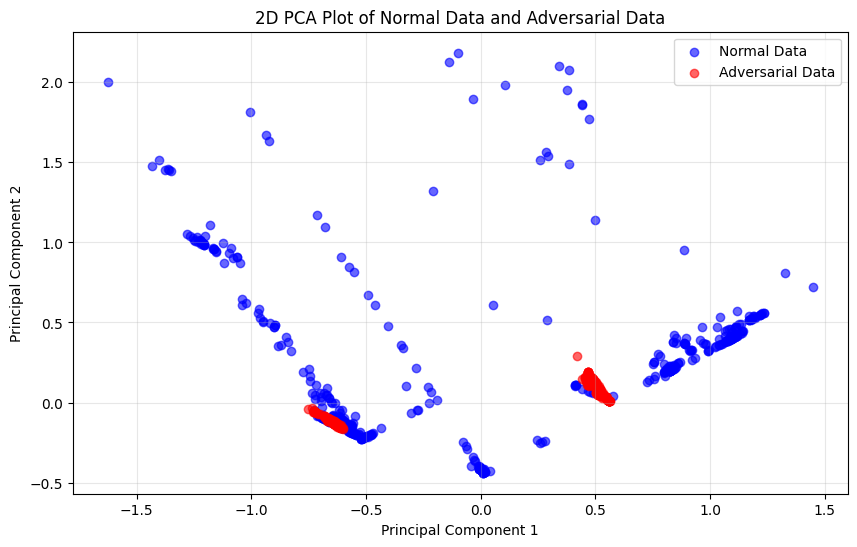

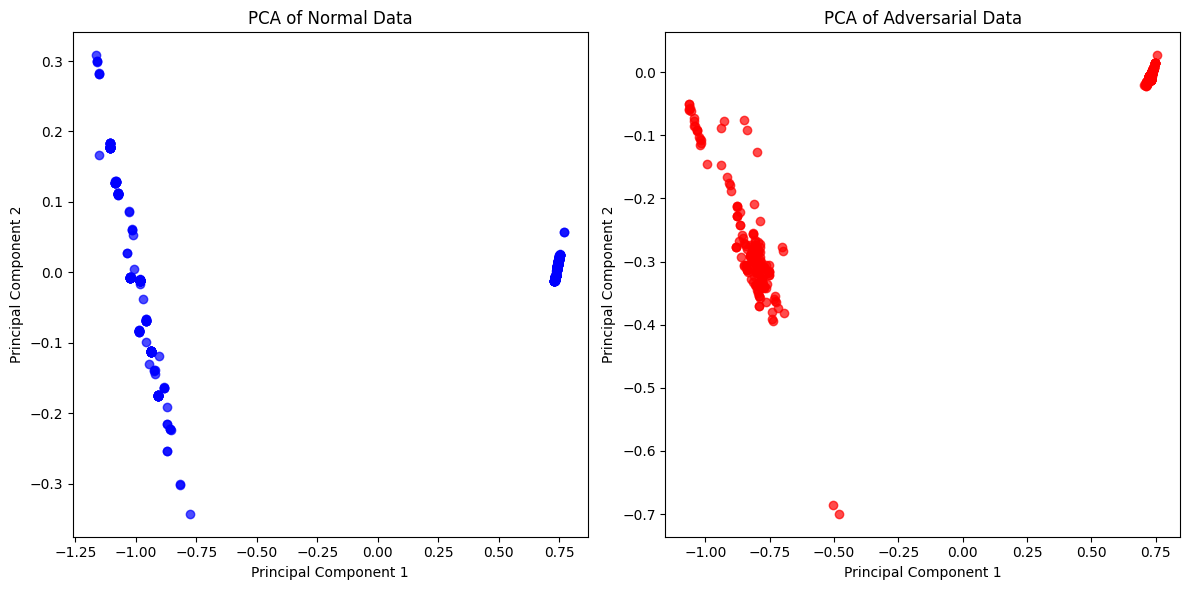

In [ ]:
import functions.visualizer as visualizer
import importlib
importlib.reload(visualizer)

visualizer.visualize_data_distribution(X_train.iloc[correctly_benign_classified_indices], 'Normal Data', X_adv.iloc[misclassified_as_benign_due_attack_indices], 'Adversarial Data')
visualizer.pca_visualization_side_by_side(X_train.iloc[misclassified_as_benign_due_attack_indices], 'Normal Data', X_adv.iloc[misclassified_as_benign_due_attack_indices], 'Adversarial Data')

## Explainer

In [ ]:
import functions.explainer as exp
import importlib
importlib.reload(exp)

explainer = exp.generate_shap_explainer(ids_model, X_train)

shap_values, shap_values_df = exp.generate_shap_values(explainer, X_train)
print(shap_values_df.shape)

shap_values_adv, shap_values_adv_df = exp.generate_shap_values(explainer, X_adv)
print(shap_values_adv_df.shape)

PermutationExplainer explainer: 1601it [01:58, 12.88it/s]                          


(1600, 70)


PermutationExplainer explainer: 1601it [01:45, 13.95it/s]                          


(1600, 70)


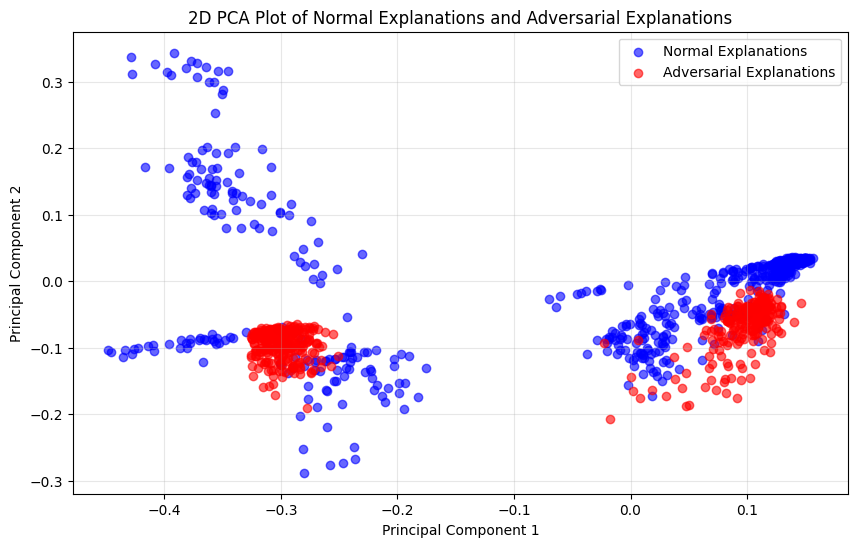

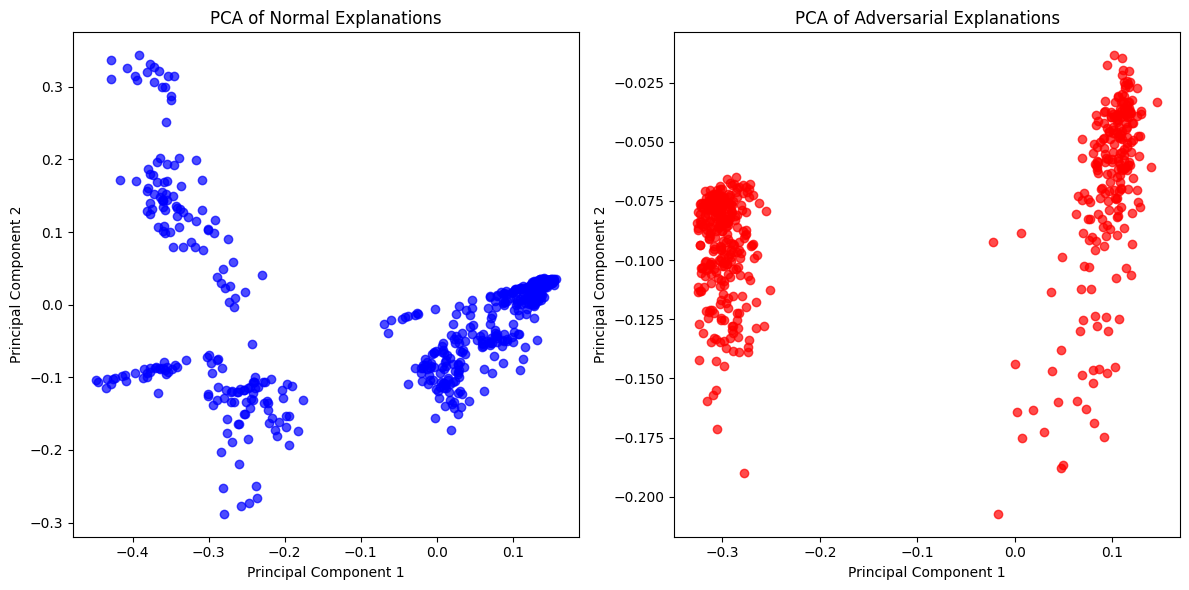

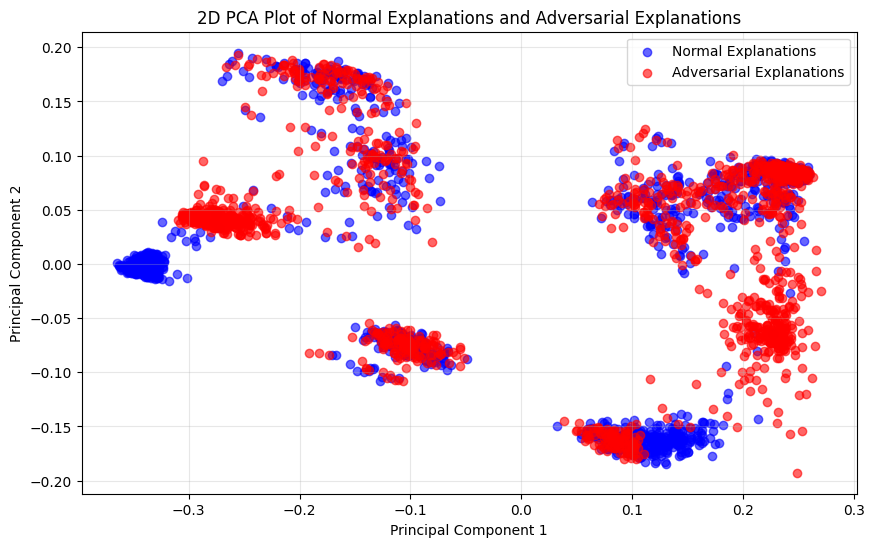

In [ ]:
visualizer.visualize_data_distribution(shap_values_df.iloc[correctly_benign_classified_indices], 'Normal Explanations', shap_values_adv_df.iloc[misclassified_as_benign_due_attack_indices], 'Adversarial Explanations')
visualizer.pca_visualization_side_by_side(shap_values_df.iloc[correctly_benign_classified_indices], 'Normal Explanations', shap_values_adv_df.iloc[misclassified_as_benign_due_attack_indices], 'Adversarial Explanations')
visualizer.visualize_data_distribution(shap_values_df, 'Normal Explanations', shap_values_adv_df, 'Adversarial Explanations')

(1600, 70) (1600, 70)


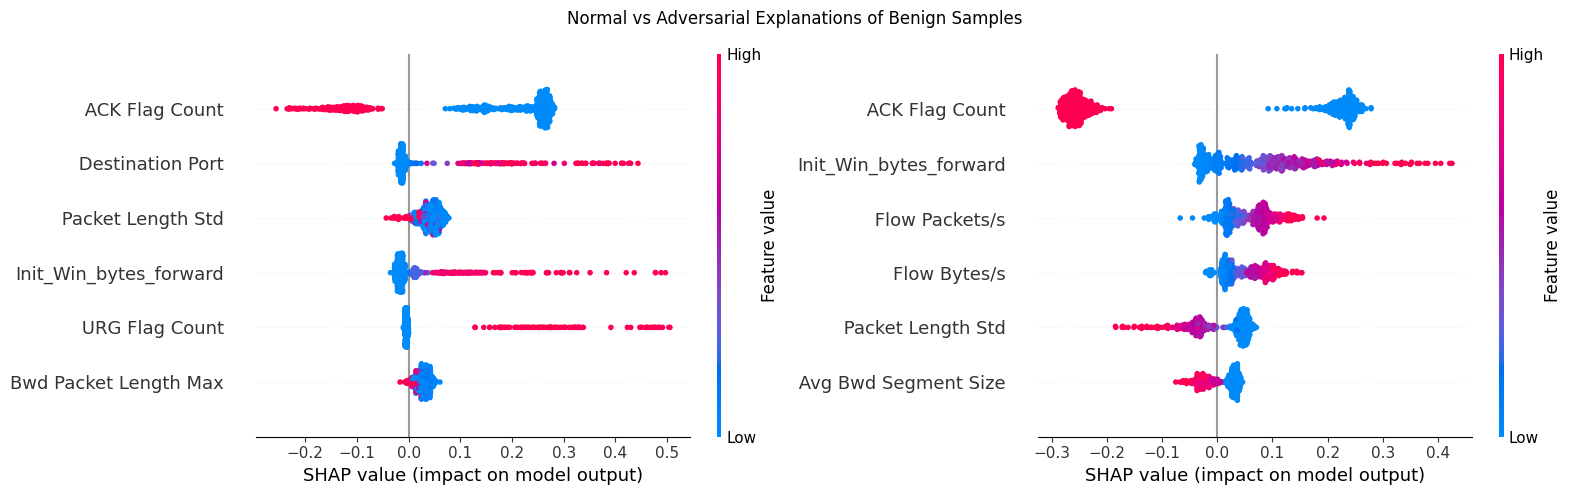

In [ ]:
print(shap_values.shape, X_train.shape)
exp.plot_shap_summary_comparison(shap_values[correctly_benign_classified_indices], X_train.iloc[correctly_benign_classified_indices], shap_values_adv[misclassified_as_benign_due_attack_indices], X_adv.iloc[misclassified_as_benign_due_attack_indices], 6, title='Normal vs Adversarial Explanations of Benign Samples')

## Detector

In [ ]:
import functions.detector as det
import importlib
importlib.reload(det)

# build detector to detect adversarial samples that misclassify attack samples as benign

# create dataframe
X, y = det.build_train_datasets(shap_values_df.iloc[correctly_benign_classified_indices], shap_values_adv_df.iloc[misclassified_as_benign_due_attack_indices])
print(X.shape, y.shape)

# split data
X_train_det, X_test_det, y_train_det, y_test_det = train_test_split(X, y, test_size=0.1, random_state=1503)
print(X_train_det.shape, X_test_det.shape, y_train_det.shape, y_test_det.shape)

# build detector
detector = det.build_detector(X_train_det, y_train_det, X_test_det, y_test_det)

(1302, 70) (1302, 2)
(1171, 70) (131, 70) (1171, 2) (131, 2)
Epoch 1/10


2025-03-17 14:41:52.801185: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6462 - loss: 0.6900 - val_accuracy: 0.7830 - val_loss: 0.6820
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7684 - loss: 0.6766 - val_accuracy: 0.7915 - val_loss: 0.6668
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7714 - loss: 0.6577 - val_accuracy: 0.7957 - val_loss: 0.6468
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7634 - loss: 0.6347 - val_accuracy: 0.8000 - val_loss: 0.6199
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7841 - loss: 0.6006 - val_accuracy: 0.8128 - val_loss: 0.5816
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7964 - loss: 0.5621 - val_accuracy: 0.8298 - val_loss: 0.5284
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8131 - loss: 0.4980 - val_accuracy: 0.8894 - val_loss: 0.4577
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8693 - loss: 0.4313 - val_accuracy: 0.9660 - val_loss: 0.3812
Ep

---
## Evaluation: Identify and Block Dangerous Adversarial Attacks

### Generate Dataset, Attacks and Explanations

In [165]:
import functions.data_preprocessing as dp
import importlib
importlib.reload(dp)

# exclude previously used samples
dataset_eval_excluded = dataset.drop(index=used_indices)

X_eval, y_eval, used_eval_indices = dp.preprocess_data(dataset_eval_excluded, encoding_type, normalizer, zero_columns, sample_size=400, random_sample_state=17)
print(y_eval.value_counts())

# TODO: use two different datasets and perform attacks only on one of them -> perform attacks on different data samples

-- Preprocessing data --
--- Sampling balanced data ---
Sample to shape: (800, 79)
--- Splitting labels and features ---
--- Encoding labels as binary one-hot values ---
--- Normalizing features using MinMaxScaler ---
BENIGN  ATTACK
False   True      400
True    False     400
Name: count, dtype: int64


In [111]:
# import pandas as pd

# # Convert one-hot encoding to single label
# y_labels = y_eval.apply(lambda row: "BENIGN" if row["BENIGN"] else "ATTACK", axis=1)

# print(y_labels.value_counts())

# # Store original labels using DataFrame index mapping
# original_labels = {idx: label for idx, label in zip(used_eval_indices, y_labels)}

# print(list(original_labels.items())[:5])

In [110]:
# ids_predictions = {}

# for idx, row in X_eval.iterrows():
#     pred = ids_model.predict(row.values.reshape(1, -1), verbose=None)  # Reshape row to (1, 70)
#     ids_predictions[idx] = pred

# print(list(ids_predictions.items())[:5])

In [166]:
importlib.reload(ag)

X_adv_eval = ag.generate_cw_attacks_parallel(art_model, X_eval, target_label=1, num_cores=num_cores)

y_pred_adv_eval = ag.evaluate_art_model(art_model, X_adv_eval, y_eval)

Running attack using 12 CPU cores...

Process 167904 is generating adversarial examples for batch of size 66 
Process 167906 is generating adversarial examples for batch of size 66 
Process 167907 is generating adversarial examples for batch of size 66 
Process 167905 is generating adversarial examples for batch of size 66 
Process 167908 is generating adversarial examples for batch of size 66 
Process 167910 is generating adversarial examples for batch of size 66 
Process 167911 is generating adversarial examples for batch of size 66 

Process 167909 is generating adversarial examples for batch of size 66 

Process 167912 is generating adversarial examples for batch of size 66 
Process 167913 is generating adversarial examples for batch of size 66 
Process 167914 is generating adversarial examples for batch of size 66 






Process 167915 is generating adversarial examples for batch of size 74 






C&W L_2:   0%|          | 0/66 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/66 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/66 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/66 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/66 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/66 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/66 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/66 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/66 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/66 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/66 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/74 [00:00<?, ?it/s]

Accuracy: 65.00%
              precision    recall  f1-score   support

      BENIGN       1.00      0.30      0.46       400
      ATTACK       0.59      1.00      0.74       400

    accuracy                           0.65       800
   macro avg       0.79      0.65      0.60       800
weighted avg       0.79      0.65      0.60       800

Confusion Matrix: Positive == BENIGN
TN: 120, FP: 280, FN: 0, TP: 400


In [167]:
# print(y_pred_adv_eval.value_counts())

In [168]:
# # storing IDS predictions

# ids_predictions = {}  # Store first-stage IDS results

# for idx, (sample, true_label) in enumerate(zip(X_adv_eval, y_eval)):
#     print(idx)
#     print(sample)
#     pred = ids_model.predict(sample)  # Get IDS prediction
#     ids_predictions[used_eval_indices[idx]] = pred  # Store prediction using original index

# print(list(ids_predictions.items())[:5])



In [169]:
importlib.reload(exp)
X_eval_adv_shap_values, X_eval_adv_shap_values_df = exp.generate_shap_values(explainer, X_adv_eval)

PermutationExplainer explainer: 801it [00:54, 12.00it/s]                         


### Split Data into BENIGN and ATTACK Predicted Samples
Our detector wants to detect misclassified benign samples, so we need to divide attack and benign samples to further work on the benign samples.

In [170]:
# benign_predicted_indices = np.where(y_pred_adv_eval[:, 0] > 0.5)[0]
# print(f"#BENIGN adv: {len(benign_predicted_indices)}")
# malicious_predicted_indices = np.where(y_pred_adv_eval[:, 1] > 0.5)[0]
# print(f"#MALICIOUS adv: {len(malicious_predicted_indices)}")

benign_predicted_indices = y_pred_adv_eval[y_pred_adv_eval == 1].index
print(benign_predicted_indices[:4])
print(f"#BENIGN adv: {len(benign_predicted_indices)}")
malicious_predicted_indices = y_pred_adv_eval[y_pred_adv_eval == 0].index
print(f"#MALICIOUS adv: {len(malicious_predicted_indices)}")

X_eval_benign = X_eval.loc[benign_predicted_indices]
X_eval_malicious = X_eval.loc[malicious_predicted_indices]
y_eval_benign = y_eval.loc[benign_predicted_indices]
y_eval_malicious = y_eval.loc[malicious_predicted_indices]
print(X_eval_benign.shape, X_eval_malicious.shape, y_eval_benign.shape, y_eval_malicious.shape)

Index([1089490, 2309453, 1243394, 973442], dtype='int64')
#BENIGN adv: 680
#MALICIOUS adv: 120
(680, 70) (120, 70) (680, 2) (120, 2)


### Convert Output and Predictions

In [171]:
importlib.reload(ids)

# TODO: prediction method in ids or elsewhere?
y_pred_eval = ids.predict(ids_model, X_eval)
print(y_pred_eval.shape)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
(800,)


In [172]:
# y_pred_eval = ids_model.predict(X_eval)
# print(y_pred_eval[0])
# # y_pred_eval = (y_pred_eval > 0.5)
# # print(y_pred_eval[0])
# y_pred_binary_eval = np.array(y_pred_eval).argmin(axis=1) # 1 == BENIGN, 0 == MALICIOUS
# print(y_pred_binary_eval[0])
# # y_pred_adv_binary_eval = np.array(y_pred_adv_eval).argmin(axis=1)
# y_eval_binary = np.array(y_eval).argmin(axis=1)

# print(y_pred_binary_eval.shape, y_pred_adv_eval.shape, y_eval_binary.shape)

### From BENIGN Data: Find Correct and Misclassified Samples
We need these samples to test our detector if it correctly classified misclassified samples.

In [182]:
print(f"#BENIGN adv: {len(y_pred_adv_eval[y_pred_adv_eval == 1].index)}")

benign_predicted_indices = y_pred_adv_eval[y_pred_adv_eval == 1].index

# divide all bening classified samples
benign_pred_indices = y_pred_eval[y_pred_eval == 1].index
adv_benign_pred_indices = y_pred_adv_eval[y_pred_adv_eval == 1].index
adv_correct_benign_indices = benign_pred_indices.intersection(adv_benign_pred_indices)
print(adv_correct_benign_indices[:4])
print(f"#adv_correct_benign_indices: {len(adv_correct_benign_indices)}")

malicious_predicted_indices = y_pred_eval[y_pred_eval == 0].index
adv_misclassified_benign_indices = malicious_predicted_indices.intersection(adv_benign_pred_indices)
print(adv_misclassified_benign_indices[:4])
print(f"#adv_misclassified_indices: {len(adv_misclassified_benign_indices)}")

#BENIGN adv: 680
Index([1089490, 2309453, 1243394, 973442], dtype='int64')
#adv_correct_benign_indices: 378
Index([1569262, 901863, 334478, 1531811], dtype='int64')
#adv_misclassified_indices: 302


In [174]:
# print(f"#BENIGN adv: {len(np.where(y_pred_adv_eval == 1)[0])}")

# # divide all bening classified samples
# adv_correct_benign_indices = np.where((y_pred_eval == 1) & (y_pred_adv_eval == 1))[0]
# print(f"#adv_correct_benign_indices: {len(adv_correct_benign_indices)}")
# adv_misclassified_benign_indices = np.where((y_pred_eval == 0) & (y_pred_adv_eval == 1))[0]
# print(f"#adv_misclassified_indices: {len(adv_misclassified_benign_indices)}")

### Create Dataset for Explanation-Detector of BENIGN Samples

In [175]:
# create dataframe that contains all benign classified samples
X_eval_detector, y_eval_detector = det.build_train_datasets(X_eval_adv_shap_values_df.loc[adv_correct_benign_indices], X_eval_adv_shap_values_df.loc[adv_misclassified_benign_indices])
print(X_eval_detector.shape, X_eval_detector.shape)

# # X = normal_benign_shap + adv_correct_benign_shap + adv_misclassified_shap
# X_eval_detector = np.concatenate((X_eval_adv_shap_values_df.iloc[adv_correct_benign_indices], X_eval_adv_shap_values_df.iloc[adv_misclassified_benign_indices]), axis=0)
# print(X_eval_detector.shape)

# y_correctly_classified_adv = np.array([[1, 0]] * len(adv_correct_benign_indices))
# y_misclassified_adv = np.array([[0, 1]] * len(adv_misclassified_benign_indices))
# y_eval_detector = np.concatenate((y_correctly_classified_adv, y_misclassified_adv), axis=0)
# import pandas as pd
# y_eval_detector = pd.DataFrame(y_eval_detector, columns=['CORRECT', 'MISCLASSIFIED'])
# print(y_eval_detector.shape)

(680, 70) (680, 70)


### Run Detector

In [176]:
from sklearn.utils import shuffle

X_eval_detector, y_eval_detector = shuffle(X_eval_detector, y_eval_detector, random_state=187)

# TODO: use prediction method
y_pred_eval_detector = detector.predict(X_eval_detector)

y_pred_eval_detector_series = y_pred_eval_detector.argmin(axis=1)
y_pred_eval_detector_series = pd.Series(y_pred_eval_detector_series, index=X_eval_detector.index)

det.evaluate_model(y_pred_eval_detector, y_eval_detector)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Global Accuracy: 98.09%
              precision    recall  f1-score   support

      BENIGN       0.98      0.99      0.98       378
 ADVERSARIAL       0.98      0.97      0.98       302

    accuracy                           0.98       680
   macro avg       0.98      0.98      0.98       680
weighted avg       0.98      0.98      0.98       680

True Negative Rate: 98.68%
False Positive Rate: 1.32%
True Positive Rate: 97.35%
False Negative Rate: 2.65%


2025-03-17 17:27:28.002420: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


### Remove Bad Adversarial Attacks from BENIGN samples

In [177]:
# find misclassified samples
predicted_bad_indices = y_pred_eval_detector_series[y_pred_eval_detector_series == 0].index
print(f"#Found Misclassified samples: {len(predicted_bad_indices)}")

# recreate dataset without bad adversarial attacks:
X_benign = X_eval_benign.drop(predicted_bad_indices)
y_benign = y_eval_benign.drop(predicted_bad_indices)
print(X_benign.shape, y_benign.shape)

# recreate original dataset with benign and attack predicted samples without the bad adversarial attacks
print(X_benign.shape, X_eval_malicious.shape)
X_test = pd.concat([X_benign, X_eval_malicious])
y_test = pd.concat([y_benign, y_eval_malicious])
print(X_test.shape, y_test.shape)
print(f"#Samples before: {X_eval.shape[0]}; #Samples after: {X_test.shape[0]}")

#Found Misclassified samples: 299
(381, 70) (381, 2)
(381, 70) (120, 70)
(501, 70) (501, 2)
#Samples before: 800; #Samples after: 501


In [178]:
# # find misclassified samples
# y_pred_eval_detector = (y_pred_eval_detector > 0.5)
# y_pred_eval_detector_binary = np.array(y_pred_eval_detector).argmin(axis=1) # 1 == CORRECT, 0 == MISCLASSIFIED
# predicted_bad_indices = np.where(y_pred_eval_detector_binary == 0)[0]

# # recreate dataset without bad adversarial attacks:
# X_benign = np.delete(X_eval_benign, predicted_bad_indices, axis=0)
# y_benign = y_eval_benign.drop(index=y_eval_benign.index[predicted_bad_indices])
# print(X_benign.shape, y_benign.shape)
# # recreate original dataset with benign and attack predicted samples without the bad adversarial attacks
# X_test = np.concatenate((X_benign, X_eval_malicious), axis=0)
# y_test = pd.concat([y_benign, y_eval_malicious], axis=0)
# print(X_test.shape, y_test.shape)
# print(f"#Samples before: {X_eval.shape[0]}; #Samples after: {X_test.shape[0]}")

### IDS on BENIGN Samples

In [179]:
y_pred = ids_model.predict(X_benign)
# Evaluate
det.evaluate_model(y_pred, y_benign)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Global Accuracy: 99.48%
              precision    recall  f1-score   support

      BENIGN       1.00      0.99      1.00       375
      ATTACK       0.75      1.00      0.86         6

    accuracy                           0.99       381
   macro avg       0.88      1.00      0.93       381
weighted avg       1.00      0.99      1.00       381

True Negative Rate: 99.47%
False Positive Rate: 0.53%
True Positive Rate: 100.00%
False Negative Rate: 0.00%


### IDS on all Samples

In [180]:
y_pred = ids_model.predict(X_test)
# Evaluate
det.evaluate_model(y_pred, y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Global Accuracy: 99.60%
              precision    recall  f1-score   support

      BENIGN       1.00      0.99      1.00       375
      ATTACK       0.98      1.00      0.99       126

    accuracy                           1.00       501
   macro avg       0.99      1.00      0.99       501
weighted avg       1.00      1.00      1.00       501

True Negative Rate: 99.47%
False Positive Rate: 0.53%
True Positive Rate: 100.00%
False Negative Rate: 0.00%
